In [54]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk

In [2]:
df=pd.read_csv(r"C:\Users\SIYA\Downloads\argoid.csv")

In [3]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [5]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [6]:
df.describe(include=np.object)

,TransactionTime,ItemDescription,Country
count,1083818,1080910,1083818
unique,23260,4223,38
top,Sat Jan 12 10:41:00 IST 2019,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,2228,4738,990956


In [7]:
df.shape

(1083818, 8)

In [8]:
df['TransactionId'].value_counts()

6309435    2228
6393409    1498
6396412    1462
6388019    1442
6143225    1410
           ... 
6044852       2
6118552       2
6006044       2
6105825       2
6060780       2
Name: TransactionId, Length: 25900, dtype: int64

In [9]:
df['UserId'].value_counts()

-1         270160
 374661     15966
 313131     11806
 296016     10256
 267708      9284
            ...  
 348159         2
 322749         2
 275835         2
 356013         2
 364287         2
Name: UserId, Length: 4373, dtype: int64

In [10]:
trans_1=df.loc[df['TransactionId']==6143225]

In [11]:
trans_1

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
505,-1,6143225,Mon Sep 10 11:58:00 IST 2018,472542,PICNIC BASKET WICKER SMALL,3,14.90,United Kingdom
1018,-1,6143225,Mon Sep 10 11:58:00 IST 2018,460614,SKULL SHOULDER BAG,129,2.25,United Kingdom
3822,-1,6143225,Mon Sep 10 11:58:00 IST 2018,475923,JUMBO BAG DOLLY GIRL DESIGN,60,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1080509,-1,6143225,Mon Sep 10 11:58:00 IST 2018,435267,LUNCH BAG BLACK SKULL.,6,5.70,United Kingdom
1080852,-1,6143225,Mon Sep 10 11:58:00 IST 2018,468069,HANGING METAL CHICKEN DECORATION,6,1.73,United Kingdom
1083197,-1,6143225,Mon Sep 10 11:58:00 IST 2018,456729,LARGE RED RETROSPOT WINDMILL,6,5.70,United Kingdom
1083278,-1,6143225,Mon Sep 10 11:58:00 IST 2018,476637,GREEN REGENCY TEACUP AND SAUCER,18,8.00,United Kingdom


In [12]:
user_1= df.loc[df['UserId']==-1]

In [13]:
user_1

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
13,-1,6058140,Mon Jul 02 07:33:00 IST 2018,435225,LUNCH BAG RED RETROSPOT,60,6.85,United Kingdom
17,-1,6288843,Sun Dec 30 12:58:00 IST 2018,489594,VINTAGE CHRISTMAS TABLECLOTH,3,34.45,United Kingdom
23,-1,6388019,Sat Feb 16 13:24:00 IST 2019,490329,ROLL WRAP VINTAGE CHRISTMAS,30,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083798,-1,6079524,Sun Jul 22 11:09:00 IST 2018,1787772,CHARLIE + LOLA BISCUITS TINS,3,11.45,United Kingdom
1083801,-1,6212338,Sun Nov 11 06:39:00 IST 2018,446166,RED RETROSPOT BIG BOWL,3,5.70,United Kingdom
1083804,-1,6272057,Wed Dec 19 11:09:00 IST 2018,458031,HANGING HEART WITH BELL,24,1.15,United Kingdom
1083810,-1,6106650,Sun Aug 12 11:53:00 IST 2018,446040,BLUE POLKADOT CUP,6,2.25,United Kingdom


In [14]:
tran=df.TransactionId.unique()

In [15]:
tran.shape

(25900,)

In [16]:
df.UserId.unique().shape

(4373,)

In [17]:
gk = df.groupby('TransactionId')

In [18]:
gk.first()

,UserId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
TransactionId,,,,,,,
5900015,374850,Mon Feb 12 04:26:00 IST 2018,477792,SET 7 BABUSHKA NESTING BOXES,6,10.56,United Kingdom
5900026,374850,Mon Feb 12 04:28:00 IST 2018,475272,HAND WARMER RED POLKA DOT,18,2.56,United Kingdom
5900037,273987,Mon Feb 12 04:34:00 IST 2018,1011927,DOORMAT NEW ENGLAND,12,10.98,United Kingdom
5900048,273987,Mon Feb 12 04:34:00 IST 2018,481194,BLUE COAT RACK PARIS FASHION,9,6.84,United Kingdom
5900059,273987,Mon Feb 12 04:35:00 IST 2018,456876,BATH BUILDING BLOCK WORD,9,8.22,United Kingdom
...,...,...,...,...,...,...,...
6397413,289317,Wed Feb 20 08:23:00 IST 2019,1785798,6 CHOCOLATE LOVE HEART T-LIGHTS,108,2.56,United Kingdom
6397424,289317,Wed Feb 20 08:25:00 IST 2019,437472,RED FLOCK LOVE HEART PHOTO FRAME,216,1.00,United Kingdom
6397435,331884,Wed Feb 20 08:31:00 IST 2019,470358,MAGNETS PACK OF 4 SWALLOWS,36,0.54,United Kingdom


In [19]:
gk.get_group(6143225)

,UserId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
505,-1,Mon Sep 10 11:58:00 IST 2018,472542,PICNIC BASKET WICKER SMALL,3,14.90,United Kingdom
1018,-1,Mon Sep 10 11:58:00 IST 2018,460614,SKULL SHOULDER BAG,129,2.25,United Kingdom
3822,-1,Mon Sep 10 11:58:00 IST 2018,475923,JUMBO BAG DOLLY GIRL DESIGN,60,3.40,United Kingdom
...,...,...,...,...,...,...,...
1080509,-1,Mon Sep 10 11:58:00 IST 2018,435267,LUNCH BAG BLACK SKULL.,6,5.70,United Kingdom
1080852,-1,Mon Sep 10 11:58:00 IST 2018,468069,HANGING METAL CHICKEN DECORATION,6,1.73,United Kingdom
1083197,-1,Mon Sep 10 11:58:00 IST 2018,456729,LARGE RED RETROSPOT WINDMILL,6,5.70,United Kingdom
1083278,-1,Mon Sep 10 11:58:00 IST 2018,476637,GREEN REGENCY TEACUP AND SAUCER,18,8.00,United Kingdom


In [20]:
df[df['CostPerItem']<0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
35768,-1,6195046,Wed Oct 24 10:51:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom
768321,-1,6195057,Wed Oct 24 10:52:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom
966149,-1,6195057,Wed Oct 24 10:52:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom
988377,-1,6195046,Wed Oct 24 10:51:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom


In [21]:
df[df['CostPerItem']==0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
148,-1,6108674,Tue Aug 14 07:12:00 IST 2018,1780905,wet damaged,-288,0.0,United Kingdom
151,-1,5914040,Fri Feb 18 11:31:00 IST 2028,445872,STRAWBERRY CERAMIC TRINKET BOX,3,0.0,United Kingdom
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
432,-1,6173783,Sun Oct 07 07:52:00 IST 2018,1428,ebay,-30,0.0,United Kingdom
668,-1,6268713,Tue Dec 18 11:16:00 IST 2018,1890294,check,-36,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
1082487,-1,6349893,Wed Jan 30 08:31:00 IST 2019,997563,found,198,0.0,United Kingdom
1083038,-1,6123590,Sun Aug 26 06:37:00 IST 2018,483105,printing smudges/thrown away,-28800,0.0,United Kingdom
1083099,-1,6357483,Sun Feb 03 08:09:00 IST 2019,490308,check,15,0.0,United Kingdom
1083738,-1,6332865,Tue Jan 22 13:58:00 IST 2019,1528842,check,-108,0.0,United Kingdom


In [22]:
df[df['NumberOfItemsPurchased']<0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
69,300909,6015757,Tue May 29 14:14:00 IST 2018,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
135,319683,6036228,Sat Jun 16 08:28:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom
148,-1,6108674,Tue Aug 14 07:12:00 IST 2018,1780905,wet damaged,-288,0.00,United Kingdom
329,321531,5925150,Sat Feb 24 11:05:00 IST 2018,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom
330,260715,6165940,Sun Sep 30 08:26:00 IST 2018,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia
...,...,...,...,...,...,...,...,...
1083663,331485,6108982,Tue Aug 14 10:15:00 IST 2018,486255,KNICKERBOCKERGLORY MAGNET ASSORTED,-3,1.15,United Kingdom
1083719,315693,6146283,Fri Sep 14 07:54:00 IST 2018,448644,PEACE SMALL WOOD LETTERS,-3,9.32,United Kingdom
1083738,-1,6332865,Tue Jan 22 13:58:00 IST 2019,1528842,check,-108,0.00,United Kingdom
1083739,-1,6167942,Mon Oct 01 09:37:00 IST 2018,337029,NaN,-93,0.00,United Kingdom


In [23]:
df[df['ItemCode']<0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
154,266301,5970085,Sat Apr 14 11:36:00 IST 2018,-1,POSTAGE,9,24.84,France
251,266028,5969843,Sat Apr 14 09:27:00 IST 2018,-1,POSTAGE,21,24.84,Germany
993,287574,6190756,Sun Oct 21 10:27:00 IST 2018,-1,Discount,-3,88.32,United Kingdom
1261,264243,6153851,Wed Sep 19 08:22:00 IST 2018,-1,POSTAGE,6,24.84,France
1293,-1,6026130,Wed Jun 06 11:50:00 IST 2018,-1,DOTCOM POSTAGE,3,304.58,United Kingdom
...,...,...,...,...,...,...,...,...
1083208,-1,6079282,Sun Jul 22 11:04:00 IST 2018,-1,DOTCOM POSTAGE,3,223.40,United Kingdom
1083250,-1,6084782,Wed Jul 25 11:53:00 IST 2018,-1,DOTCOM POSTAGE,3,210.03,United Kingdom
1083503,-1,6167238,Mon Oct 01 07:42:00 IST 2018,-1,Manual,3,622.96,United Kingdom
1083581,260715,6035271,Wed Jun 13 10:28:00 IST 2018,-1,POSTAGE,3,483.00,Australia


In [24]:
trans_id=df[df['UserId']==-1]['TransactionId']

In [25]:
trans_id.shape

(270160,)

In [26]:
trans_id=df[df['UserId']==-1]['TransactionId'].unique()

In [27]:
trans_id.shape

(3710,)

In [28]:
count=11
for i in trans_id:
    df.loc[df.TransactionId==i,'UserId']=count
    count+=1

In [29]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,11,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,221,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [30]:
item=df[df['ItemCode']==-1]['ItemDescription']

In [31]:
item.shape

(5592,)

In [32]:
item=df[df['ItemCode']==-1]['ItemDescription'].unique()

In [33]:
item.shape

(13,)

In [34]:
item1=df[df['ItemDescription']=='POSTAGE']['ItemCode']

In [35]:
item1

154       -1
251       -1
1261      -1
1773      -1
2700      -1
          ..
1081642   -1
1081982   -1
1082314   -1
1083108   -1
1083581   -1
Name: ItemCode, Length: 2504, dtype: int64

In [36]:
count=10000000
for i in item:
    df.loc[df.ItemDescription==i,'ItemCode']=count
    count+=1

In [37]:
df.isnull().values.any()

True

In [38]:
df.isnull().sum().sum()

2908

In [39]:
df.isnull().any()

UserId                    False
TransactionId             False
TransactionTime           False
ItemCode                  False
ItemDescription            True
NumberOfItemsPurchased    False
CostPerItem               False
Country                   False
dtype: bool

In [40]:
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [41]:
nan_rows = df[df['ItemDescription'].isnull()]

In [42]:
nan_rows

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,80,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
762,163,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.0,United Kingdom
1080,217,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.0,United Kingdom
2204,345,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.0,United Kingdom
2210,346,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
1080070,3453,6074486,Wed Jul 18 11:26:00 IST 2018,462735,NaN,-480,0.0,United Kingdom
1080468,3125,6178260,Tue Oct 09 12:18:00 IST 2018,472542,NaN,3,0.0,United Kingdom
1080485,2768,6237649,Wed Nov 28 07:41:00 IST 2018,471492,NaN,-189,0.0,United Kingdom
1080983,3401,6128529,Wed Aug 29 05:34:00 IST 2018,755265,NaN,6,0.0,United Kingdom


In [43]:
df.dropna(subset = ["ItemDescription"], inplace=True)

In [44]:
nan_value = float("NaN")

df.replace(-15265.64, nan_value, inplace=True)

df.dropna(subset = ["CostPerItem"], inplace=True)

In [45]:
nan_value = float("NaN")

df.replace(0, nan_value, inplace=True)

df.dropna(subset = ["CostPerItem"], inplace=True)

In [46]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.078784e+06,1.078784e+06,1.078784e+06,1.078784e+06,1.078784e+06
mean,2.422058e+05,6.159586e+06,7.088769e+05,2.953771e+01,9.599726e+00
std,1.415761e+05,1.476519e+05,8.056385e+05,6.462377e+02,2.313331e+03
min,1.100000e+01,5.900015e+06,4.200000e+01,-2.429850e+05,1.000000e-02
25%,2.599800e+05,6.026933e+06,4.615170e+05,3.000000e+00,1.730000e+00
50%,3.022950e+05,6.167546e+06,4.755660e+05,9.000000e+00,2.880000e+00
75%,3.415650e+05,6.290064e+06,4.891320e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.000001e+07,2.429850e+05,1.696285e+06


In [84]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,11,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,221,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [85]:
df['Country'].value_counts()

United Kingdom          985958
Germany                  18986
France                   17112
EIRE                     16384
Spain                     5064
Netherlands               4734
Belgium                   4138
Switzerland               4002
Portugal                  3038
Australia                 2512
Norway                    2170
Italy                     1606
Channel Islands           1516
Finland                   1390
Cyprus                    1244
Sweden                     924
Unspecified                892
Austria                    802
Denmark                    778
Japan                      716
Poland                     682
Israel                     594
USA                        582
Hong Kong                  576
Singapore                  458
Iceland                    364
Canada                     302
Greece                     292
Malta                      254
United Arab Emirates       136
European Community         122
RSA                        114
Lebanon 

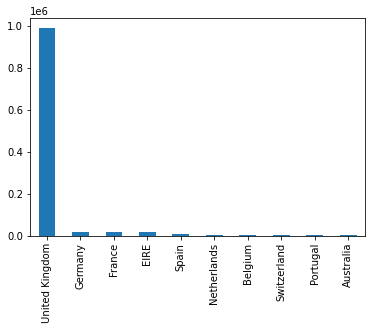

In [86]:
df.Country.value_counts()[:10].plot(kind='bar')

In [87]:
uk_data=df[df.Country=='United Kingdom']

In [88]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985958 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  985958 non-null  int64  
 1   TransactionId           985958 non-null  int64  
 2   TransactionTime         985958 non-null  object 
 3   ItemCode                985958 non-null  int64  
 4   ItemDescription         985958 non-null  object 
 5   NumberOfItemsPurchased  985958 non-null  int64  
 6   CostPerItem             985958 non-null  float64
 7   Country                 985958 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 67.7+ MB


In [89]:
uk_data.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,985958.000000,9.859580e+05,9.859580e+05,985958.000000,9.859580e+05
mean,239753.113719,6.159355e+06,6.970262e+05,26.772075,9.794548e+00
std,146942.415142,1.485303e+05,6.965321e+05,674.510526,2.419630e+03
min,11.000000,5.900015e+06,4.200000e+01,-242985.000000,1.000000e-02
25%,829.000000,6.026460e+06,4.615170e+05,3.000000,1.730000e+00
50%,305361.000000,6.166105e+06,4.756710e+05,9.000000,2.900000e+00
75%,345660.000000,6.292308e+06,4.892580e+05,30.000000,5.700000e+00
max,384027.000000,6.397446e+06,1.000001e+07,242985.000000,1.696285e+06


In [90]:
uk_data = uk_data[(uk_data['NumberOfItemsPurchased']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970246 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  970246 non-null  int64  
 1   TransactionId           970246 non-null  int64  
 2   TransactionTime         970246 non-null  object 
 3   ItemCode                970246 non-null  int64  
 4   ItemDescription         970246 non-null  object 
 5   NumberOfItemsPurchased  970246 non-null  int64  
 6   CostPerItem             970246 non-null  float64
 7   Country                 970246 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.6+ MB


In [96]:
uk_data['TotalPrice'] = uk_data['NumberOfItemsPurchased'] * uk_data['CostPerItem']

In [92]:
uk_data=uk_data[['UserId','TransactionId','TransactionTime','NumberOfItemsPurchased','CostPerItem']]

In [93]:
uk_data['TransactionTime'].min(),uk_data['TransactionTime'].max()

('Fri Apr 06 06:15:00 IST 2018', 'Wed Sep 26 13:29:00 IST 2018')

In [94]:
PRESENT = dt.datetime(2020,6,6)
uk_data['TransactionTime'] = pd.to_datetime(uk_data['TransactionTime'])

c:\python36\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [97]:
uk_data.head()

,UserId,TransactionId,TransactionTime,NumberOfItemsPurchased,CostPerItem,TotalPrice
0,278166,6355745,2019-02-02 12:50:00,6,11.73,70.38
1,337701,6283376,2018-12-26 09:06:00,3,3.52,10.56
3,380478,6044973,2018-06-22 07:14:00,3,1.73,5.19
4,11,6143225,2018-09-10 11:58:00,3,3.40,10.20
5,285957,6307136,2019-01-11 09:50:00,12,3.52,42.24


In [98]:
rfm= uk_data.groupby('UserId').agg({'TransactionTime': lambda date: (PRESENT - date.max()).days,
                                        'TransactionId': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [99]:
rfm.columns

Index(['TransactionTime', 'TransactionId', 'TotalPrice'], dtype='object')

In [100]:
rfm.columns=['monetary','frequency','recency']

In [101]:
rfm['recency'] = rfm['recency'].astype(int)

In [102]:
rfm.head()

,monetary,frequency,recency
UserId,,,
11,634,1410,72177
12,704,158,24458
13,523,528,14997
14,475,1442,74758
15,572,408,12627


In [103]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [104]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
UserId,,,,,,
11,634,1410,72177,4,1,2
12,704,158,24458,4,2,1
13,523,528,14997,4,1,3
14,475,1442,74758,4,1,4
15,572,408,12627,3,1,2


In [105]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
UserId,,,,,,,
11,634,1410,72177,4,1,2,412
12,704,158,24458,4,2,1,421
13,523,528,14997,4,1,3,413
14,475,1442,74758,4,1,4,414
15,572,408,12627,3,1,2,312


In [106]:
rfm[rfm['RFM_Score']=='421'].sort_values('monetary', ascending=False).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
UserId,,,,,,,
514,824,186,14382,4,2,1,421
977,800,170,15609,4,2,1,421
269,796,154,16026,4,2,1,421
581,793,182,16634,4,2,1,421
147,789,178,15055,4,2,1,421


In [107]:
rfm['RFM_Score'].value_counts()

414    468
141    452
142    277
413    236
232    228
231    223
324    194
233    193
323    190
143    187
322    158
412    126
424    117
321    110
411    110
234    104
314     99
144     96
221     92
423     90
131     87
223     86
311     85
312     84
333     83
242     81
313     80
332     79
132     78
222     73
241     73
422     67
133     62
334     60
224     59
243     52
331     31
134     29
244     29
342     28
421     25
434     20
124     18
123     17
433     15
432     15
344     15
341     14
442     13
343     13
214     13
122     11
121     10
213     10
443      7
444      7
212      6
441      5
431      2
211      1
Name: RFM_Score, dtype: int64

In [108]:
rfm.shape

(5293, 7)

In [109]:
segment=rfm.RFM_Score.unique()

In [110]:
segment.shape

(60,)

In [111]:
rfm['RFM_Score'].median()

244.0

In [112]:
rfm['RFM_Score'].mode()

0    414
dtype: object

In [113]:
rfm.to_csv ('Output.csv')